In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../data/processed/retail_cleaned.csv")
df["invoicedate"] = pd.to_datetime(df["invoicedate"])

df.head()


,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,revenue,month,year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12,2010
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12,2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12,2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12,2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12,2010


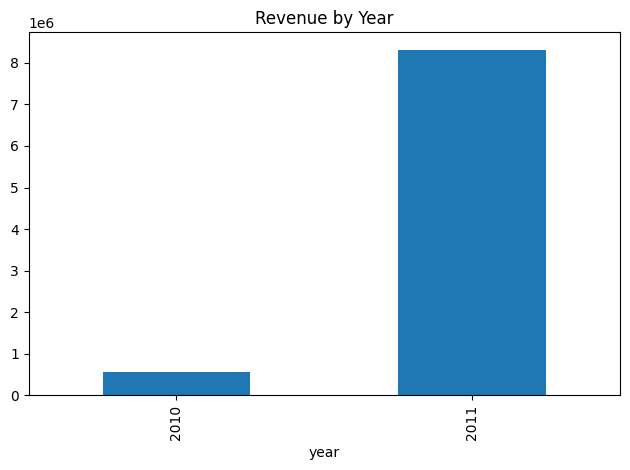

year
2010     570422.730
2011    8316786.164
Name: revenue, dtype: float64

In [2]:
yearly_revenue = df.groupby("year")["revenue"].sum()

plt.figure()
yearly_revenue.plot(kind="bar")
plt.title("Revenue by Year")
plt.tight_layout()
plt.show()

yearly_revenue


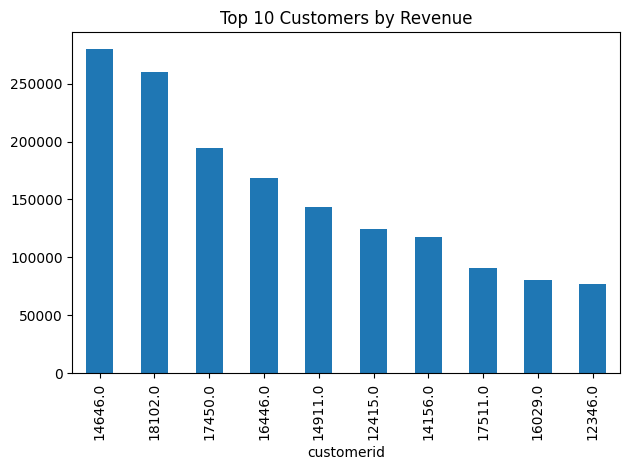

customerid
14646.0    280206.02
18102.0    259657.30
17450.0    194390.79
16446.0    168472.50
14911.0    143711.17
12415.0    124914.53
14156.0    117210.08
17511.0     91062.38
16029.0     80850.84
12346.0     77183.60
Name: revenue, dtype: float64

In [3]:
top_customers = df.groupby("customerid")["revenue"].sum().sort_values(ascending=False).head(10)

plt.figure()
top_customers.plot(kind="bar")
plt.title("Top 10 Customers by Revenue")
plt.tight_layout()
plt.show()

top_customers


In [4]:
monthly_revenue = df.groupby("month")["revenue"].sum()
monthly_growth = monthly_revenue.pct_change() * 100

monthly_growth.head()


month
2010-12          NaN
2011-01    -0.406965
2011-02   -21.477928
2011-03    33.176831
2011-04   -21.159954
Name: revenue, dtype: float64